In [2]:
# libraries
import numpy as np
import pandas as pd
import pyreadr
import scipy
import matplotlib.pyplot as plt

In [3]:
perfomances_dt2 = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/perfomances_dt2.rds")[None] # also works for RData
W_peak_dt = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/W_peak_dt.rds")[None] # also works for RData


In [4]:
W_peak_dt = W_peak_dt[['NMS','policy']]
#add the baselevel
# df = pd.DataFrame({'NMS': ['1'],
#                    'policy': ['fee_0']})
# W_peak_dt = W_peak_dt.append(df, ignore_index=True)

#Filter the columns that are at the peak
keys = list(W_peak_dt.columns.values)
i1 = perfomances_dt2.set_index(keys).index
i2 = W_peak_dt.set_index(keys).index
perfomances_opt_df = perfomances_dt2[i1.isin(i2)].reset_index()
#Rename the base-level
# perfomances_opt_df.loc[perfomances_opt_df.policy == "fee_0","policy"]= "base-level"
# Get the base-level  data and name it with a zero
baselevel_df = perfomances_dt2.loc[(perfomances_dt2.policy == "fee_0")& (perfomances_dt2.NMS == "1"),['id_10', 'id_field', 'z', 'N_fert','L','P']]
baselevel_df = baselevel_df.rename(columns={"N_fert":"N_fert_0", "L": "L_0", "P": "P_0"})

# Merge it with the perfomances_opt_df
perfomances_opt_df = pd.merge(perfomances_opt_df, baselevel_df,  how='left', left_on=['id_10', 'id_field', 'z'], right_on = ['id_10', 'id_field', 'z'])

# Calculate the differences in P and L
perfomances_opt_df['P_diff'] = perfomances_opt_df['P'] - perfomances_opt_df['P_0']
perfomances_opt_df['L_diff'] = perfomances_opt_df['L'] - perfomances_opt_df['L_0']



In [5]:
#Average across z
# perfomances_opt_df2 = perfomances_opt_df.groupby(['policy', 'NMS', 'id_10', 'id_field'], as_index=False).mean()
perfomances_opt_df2 = perfomances_opt_df.groupby(['policy', 'NMS', 'id_10', 'id_field']).mean().reset_index().drop(['index'], axis=1)

# new data frame with split value columns 
perfomances_opt_df2['policy_name'] = perfomances_opt_df2["policy"].str.split("_", n = 1, expand = True)[0]  
perfomances_opt_df2['policy_val'] = perfomances_opt_df2["policy"].str.split("_", n = 1, expand = True)[1]  
perfomances_opt_df2 = perfomances_opt_df2[perfomances_opt_df2.L_0 < 200]

In [6]:
# ratio_1_dt = perfomances_opt_df2[(perfomances_opt_df2['policy_name'] == 'ratio') & (perfomances_dt5['NMS'] == '1')]
# fee_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'fee') & (perfomances_dt5['NMS'] == '1')]
# nred_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'nred') & (perfomances_dt5['NMS'] == '1')]
# subs_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'subs') & (perfomances_dt5['NMS'] == '1')]

ratio_2_dt = perfomances_opt_df2[(perfomances_opt_df2['policy_name'] == 'ratio') & (perfomances_opt_df2['NMS'] == '2')]
fee_2_dt = perfomances_opt_df2[(perfomances_opt_df2['policy_name'] == 'fee') & (perfomances_opt_df2['NMS'] == '2')]
nred_2_dt = perfomances_opt_df2[(perfomances_opt_df2['policy_name'] == 'nred') & (perfomances_opt_df2['NMS'] == '2')]
nred_2_dt

,policy,NMS,id_10,id_field,region,Y_corn,Y_soy,L1,L2,L,...,P,G,area_ha,N_fert_0,L_0,P_0,P_diff,L_diff,policy_name,policy_val
11754,nred_0.91,2,5,1.0,3,11783.863449,4099.574380,18.135271,18.917515,37.052786,...,2809.281483,0.0,40.0,160.0,43.408086,2884.658188,-75.376705,-6.355300,nred,0.91
11755,nred_0.91,2,5,2.0,3,12103.089976,3971.104962,25.759509,20.171595,45.931105,...,2818.153458,0.0,40.0,160.0,53.950774,2858.986923,-40.833465,-8.019669,nred,0.91
11756,nred_0.91,2,5,3.0,3,12418.618906,4181.580102,23.094685,22.261399,45.356084,...,2923.156800,0.0,40.0,160.0,52.246915,2982.796704,-59.639904,-6.890831,nred,0.91
11757,nred_0.91,2,5,4.0,3,11900.603660,3992.645500,23.210009,16.324727,39.534736,...,2793.854662,0.0,40.0,160.0,46.524298,2861.295271,-67.440609,-6.989561,nred,0.91
11758,nred_0.91,2,17,1.0,3,8992.515964,3501.786844,43.477341,29.148923,72.626264,...,2258.023616,0.0,40.0,160.0,89.189539,2354.674190,-96.650575,-16.563275,nred,0.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15667,nred_0.91,2,1512,4.0,1,10169.603043,3141.463325,31.740495,32.446819,64.187314,...,2281.006765,0.0,40.0,170.0,76.747720,2310.022686,-29.015920,-12.560406,nred,0.91
15668,nred_0.91,2,1514,1.0,1,11241.633705,3049.697904,32.067300,17.954631,50.021931,...,2400.585058,0.0,40.0,170.0,61.368382,2492.053894,-91.468836,-11.346451,nred,0.91
15669,nred_0.91,2,1514,2.0,1,11154.312092,3320.064340,35.276303,30.028646,65.304949,...,2467.454568,0.0,40.0,170.0,75.787860,2490.737738,-23.283170,-10.482912,nred,0.91
15670,nred_0.91,2,1522,1.0,1,11100.687951,2949.760990,32.265862,17.668330,49.934191,...,2351.214565,0.0,40.0,170.0,61.380726,2434.594284,-83.379720,-11.446535,nred,0.91


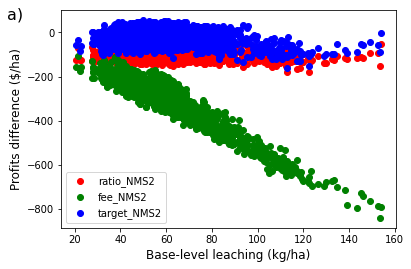

In [35]:
# Profits change by base-level L
 
fig, ax = plt.subplots()
# ax.plot(ratio_1_dt['L_change'], ratio_1_dt['C'], color = 'r', label = 'ratio_NMS1')
# ax.plot(fee_1_dt['L_change'], fee_1_dt['C'], color = 'g', label = 'fee_NMS1')
# ax.plot(nred_1_dt['L_change'], nred_1_dt['C'], color = 'b', label = 'target_NMS1')
ax.scatter(ratio_2_dt['L_0'], ratio_2_dt['P_diff'], color = 'r',  label = 'ratio_NMS2')
ax.scatter(fee_2_dt['L_0'], fee_2_dt['P_diff'], color = 'g', label = 'fee_NMS2')
ax.scatter(nred_2_dt['L_0'], nred_2_dt['P_diff'], color = 'b', label = 'target_NMS2')
# ax.plot(subs_2_dt['L_change'], subs_2_dt['C'], color = 'y', label = 'subs_NMS2')

plt.legend()

plt.xlabel("Base-level leaching (kg/ha)", size = 12)
plt.ylabel("Profits difference ($/ha)", size = 12)
plt.gcf().text(0, 0.85, 'a)', fontsize=16)
# ax.set_xticks((np.arange(0, 21, 1)))
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_scatter_a.png"
plt.savefig(plot_file_name, dpi=300)

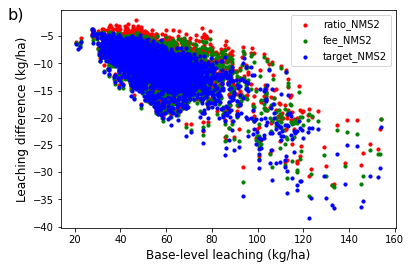

In [36]:
# L change by base-level L
 
fig, ax = plt.subplots()
# ax.plot(ratio_1_dt['L_change'], ratio_1_dt['C'], color = 'r', label = 'ratio_NMS1')
# ax.plot(fee_1_dt['L_change'], fee_1_dt['C'], color = 'g', label = 'fee_NMS1')
# ax.plot(nred_1_dt['L_change'], nred_1_dt['C'], color = 'b', label = 'target_NMS1')
ax.scatter(ratio_2_dt['L_0'], ratio_2_dt['L_diff'], color = 'r',  label = 'ratio_NMS2', s = 10)
ax.scatter(fee_2_dt['L_0'], fee_2_dt['L_diff'], color = 'g', label = 'fee_NMS2', s = 10)
ax.scatter(nred_2_dt['L_0'], nred_2_dt['L_diff'], color = 'b', label = 'target_NMS2', s = 10)
plt.legend()

plt.xlabel("Base-level leaching (kg/ha)", size = 12)
plt.ylabel("Leaching difference (kg/ha)", size = 12)
plt.gcf().text(0, 0.85, 'b)', fontsize=16)
# ax.set_xticks((np.arange(0, 21, 1)))
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_scatter_b.png"
plt.savefig(plot_file_name, dpi=300)

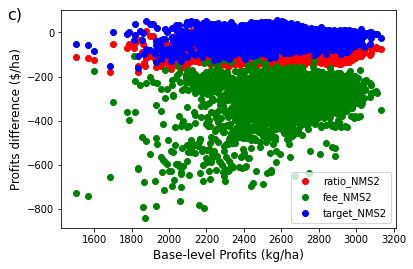

In [37]:
# Profits change by base-level P
 
fig, ax = plt.subplots()
# ax.plot(ratio_1_dt['L_change'], ratio_1_dt['C'], color = 'r', label = 'ratio_NMS1')
# ax.plot(fee_1_dt['L_change'], fee_1_dt['C'], color = 'g', label = 'fee_NMS1')
# ax.plot(nred_1_dt['L_change'], nred_1_dt['C'], color = 'b', label = 'target_NMS1')
ax.scatter(ratio_2_dt['P_0'], ratio_2_dt['P_diff'], color = 'r',  label = 'ratio_NMS2')
ax.scatter(fee_2_dt['P_0'], fee_2_dt['P_diff'], color = 'g', label = 'fee_NMS2')
ax.scatter(nred_2_dt['P_0'], nred_2_dt['P_diff'], color = 'b', label = 'target_NMS2')
# ax.plot(subs_2_dt['L_change'], subs_2_dt['C'], color = 'y', label = 'subs_NMS2')

plt.legend()

plt.xlabel("Base-level Profits (kg/ha)", size = 12)
plt.ylabel("Profits difference ($/ha)", size = 12)
plt.gcf().text(0, 0.85, 'c)', fontsize=16)
# ax.set_xticks((np.arange(0, 21, 1)))

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_scatter_c.png"
plt.savefig(plot_file_name, dpi=300)

index    policy NMS    L_0_bin     P_diff                 
                                        mean        std count
8      8  ratio_11   2    (0, 45] -93.154346  22.547345   689
9      9  ratio_11   2   (45, 55] -86.447695  23.167357  1514
10    10  ratio_11   2   (55, 65] -84.074709  25.887793   936
11    11  ratio_11   2  (65, 160] -87.223011  27.524651   778

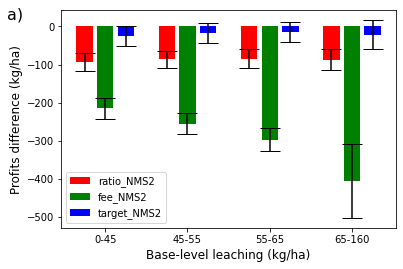

In [38]:
# BARCHART P_diff by base-level L 

# cut_labels_4 = ['silver', 'gold', 'platinum', 'diamond']
# cut_bins = [0, 70000, 100000, 130000, 200000]
# df['cut_ex1'] = pd.cut(df['ext price'], bins=cut_bins, labels=cut_labels_4)
cut_bins = [0, 45, 55, 65, 160]

perfomances_opt_df2['L_0_bin'] = pd.cut(perfomances_opt_df2['L_0'], bins=cut_bins)
perfomances_opt_df2

bar_dt = perfomances_opt_df2[perfomances_opt_df2.NMS == '2'].groupby(['policy', 'NMS', 'L_0_bin'], 
                                                                     as_index=False).agg(
                      {'P_diff':['mean','std', 'count']}).reset_index()
bar_dt

bar_ratio_dt = bar_dt[(bar_dt['policy'] == 'ratio_11') ]
bar_fee_dt = bar_dt[(bar_dt['policy'] == 'fee_6')]
bar_nred_dt = bar_dt[(bar_dt['policy'] == 'nred_0.91')]

fig, ax = plt.subplots()

pos = [0,4,8,12]
pos2 = [x + 1 for x in pos] 
pos3 = [x + 2 for x in pos]

ax.bar(x = pos, height = bar_ratio_dt['P_diff']['mean'],color = 'r', label = 'ratio_NMS2',
      yerr=bar_ratio_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos2, height = bar_fee_dt['P_diff']['mean'],color = 'g', label = 'fee_NMS2',
      yerr=bar_fee_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos3, height = bar_nred_dt['P_diff']['mean'],color = 'b', label = 'target_NMS2',
      yerr=bar_nred_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)
plt.legend()

plt.xlabel("Base-level leaching (kg/ha)", size = 12)
plt.ylabel("Profits difference (kg/ha)", size = 12)
plt.gcf().text(0, 0.85, 'a)', fontsize=16)
plt.xticks(pos2, ['0-45', '45-55', '55-65', '65-160'])
plt.legend()
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_a.png"
plt.savefig(plot_file_name, dpi=300)
bar_ratio_dt

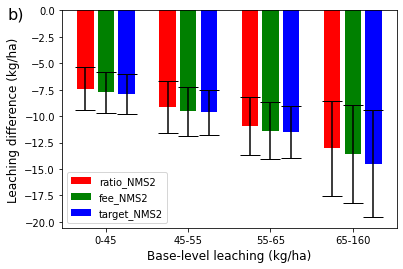

In [39]:
# BARCHART L change by base-level L 

# cut_labels_4 = ['silver', 'gold', 'platinum', 'diamond']
# cut_bins = [0, 70000, 100000, 130000, 200000]
# df['cut_ex1'] = pd.cut(df['ext price'], bins=cut_bins, labels=cut_labels_4)
cut_bins = [0, 45, 55, 65, 160]

perfomances_opt_df2['L_0_bin'] = pd.cut(perfomances_opt_df2['L_0'], bins=cut_bins)
perfomances_opt_df2

bar_dt = perfomances_opt_df2[perfomances_opt_df2.NMS == '2'].groupby(['policy', 'NMS', 'L_0_bin'], 
                                                                     as_index=False).agg(
                      {'L_diff':['mean','std', 'count']}).reset_index()
bar_dt

bar_ratio_dt = bar_dt[(bar_dt['policy'] == 'ratio_11') ]
bar_fee_dt = bar_dt[(bar_dt['policy'] == 'fee_6')]
bar_nred_dt = bar_dt[(bar_dt['policy'] == 'nred_0.91')]

fig, ax = plt.subplots()

pos = [0,4,8,12]
pos2 = [x + 1 for x in pos] 
pos3 = [x + 2 for x in pos]

ax.bar(x = pos, height = bar_ratio_dt['L_diff']['mean'],color = 'r',label = 'ratio_NMS2',
      yerr=bar_ratio_dt['L_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos2, height = bar_fee_dt['L_diff']['mean'],color = 'g',label = 'fee_NMS2',
      yerr=bar_fee_dt['L_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos3, height = bar_nred_dt['L_diff']['mean'],color = 'b',label = 'target_NMS2',
      yerr=bar_nred_dt['L_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)
plt.legend()

plt.gcf().text(0, 0.85, 'b)', fontsize=16)
plt.xlabel("Base-level leaching (kg/ha)", size = 12)
plt.ylabel("Leaching difference (kg/ha)", size = 12)

plt.xticks(pos2, ['0-45', '45-55', '55-65', '65-160'])

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_b.png"
plt.savefig(plot_file_name, dpi=300)

index    policy NMS       P_0_bin     P_diff                 
                                           mean        std count
8      8  ratio_11   2     (0, 2500] -88.310113  33.413510   857
9      9  ratio_11   2  (2500, 2600] -83.304876  26.787518   931
10    10  ratio_11   2  (2600, 2800] -84.426051  20.578045  1198
11    11  ratio_11   2  (2800, 5000] -93.703082  15.305380   931

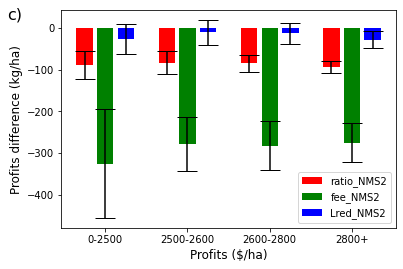

In [34]:
# BARCHART P_diff change by base-level L

# cut_labels_4 = ['silver', 'gold', 'platinum', 'diamond']
# cut_bins = [0, 70000, 100000, 130000, 200000]
# df['cut_ex1'] = pd.cut(df['ext price'], bins=cut_bins, labels=cut_labels_4)
cut_bins = [0, 2500, 2600, 2800, 5000]

perfomances_opt_df2['P_0_bin'] = pd.cut(perfomances_opt_df2['P_0'], bins=cut_bins)

bar_dt = perfomances_opt_df2[perfomances_opt_df2.NMS == '2'].groupby(['policy', 'NMS', 'P_0_bin'], 
                                                                     as_index=False).agg(
                      {'P_diff':['mean','std', 'count']}).reset_index()


bar_ratio_dt = bar_dt[(bar_dt['policy'] == 'ratio_11') ]
bar_fee_dt = bar_dt[(bar_dt['policy'] == 'fee_6')]
bar_nred_dt = bar_dt[(bar_dt['policy'] == 'nred_0.91')]

fig, ax = plt.subplots()

pos = [0,4,8,12]
pos2 = [x + 1 for x in pos] 
pos3 = [x + 2 for x in pos]

ax.bar(x = pos, height = bar_ratio_dt['P_diff']['mean'],color = 'r', label = 'ratio_NMS2',
      yerr=bar_ratio_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos2, height = bar_fee_dt['P_diff']['mean'],color = 'g', label = 'fee_NMS2',
      yerr=bar_fee_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos3, height = bar_nred_dt['P_diff']['mean'],color = 'b', label = 'target_NMS2',
      yerr=bar_nred_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)
plt.legend()

plt.xlabel("Profits ($/ha)", size = 12)
plt.ylabel("Profits difference (kg/ha)", size = 12)
plt.gcf().text(0, 0.85, 'c)', fontsize=16)

plt.xticks(pos2, ['0-2500', '2500-2600', '2600-2800', '2800+'])

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_c.png"
plt.savefig(plot_file_name, dpi=300)
bar_ratio_dt

Text(0, 0.5, 'Density')

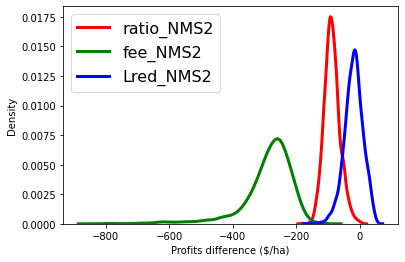

In [52]:
import seaborn as sns

sns.distplot(ratio_2_dt['P_diff'], hist = False, kde = True,color = 'r', kde_kws = {'linewidth': 3}, label = 'ratio_NMS2')
sns.distplot(fee_2_dt['P_diff'], hist = False, kde = True,color = 'g', kde_kws = {'linewidth': 3}, label = 'fee_NMS2')
sns.distplot(nred_2_dt['P_diff'], hist = False, kde = True,color = 'b', kde_kws = {'linewidth': 3}, label = 'target_NMS2')
   
# Plot formatting
plt.legend(prop={'size': 16})
# plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Profits difference ($/ha)')
plt.ylabel('Density')

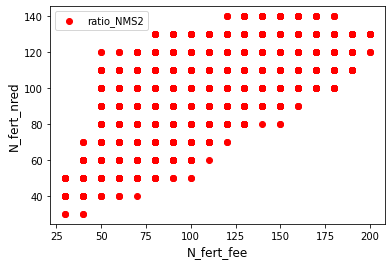

In [53]:
# comp_df = pd.merge(fee_2_dt[['id_10', 'id_field', 'N_fert']],
#                    nred_2_dt[['id_10', 'id_field', 'N_fert']],  how='left', left_on=['id_10', 'id_field'], right_on = ['id_10', 'id_field'])


# comp_df

# new data frame with split value columns 
perfomances_opt_df['policy_name'] = perfomances_opt_df["policy"].str.split("_", n = 1, expand = True)[0]  
perfomances_opt_df['policy_val'] = perfomances_opt_df["policy"].str.split("_", n = 1, expand = True)[1]  
perfomances_opt_df = perfomances_opt_df[perfomances_opt_df.L_0 < 200]

fee_2_comp_dt = perfomances_opt_df[(perfomances_opt_df['policy_name'] == 'fee') & (perfomances_opt_df['NMS'] == '2')]
nred_2_comp_dt = perfomances_opt_df[(perfomances_opt_df['policy_name'] == 'nred') & (perfomances_opt_df['NMS'] == '2')]

comp_df = pd.merge(fee_2_comp_dt[['id_10', 'id_field', 'z','N_fert']],
                   nred_2_comp_dt[['id_10', 'id_field', 'z','N_fert']],  how='left', on=['id_10', 'id_field', 'z'],
                  suffixes=('_fee', '_nred'))
comp_df

fig, ax = plt.subplots()
ax.scatter(comp_df['N_fert_fee'], comp_df['N_fert_nred'], color = 'r',  label = 'ratio_NMS2')
plt.xlabel("N_fert_fee", size = 12)
plt.ylabel("N_fert_nred", size = 12)
plt.legend()